# Stress and Achievement ML predictor

This notebook is intended for making predictions based on past survey responses using a random forest. To try out the model simply fork this notebook and hit run all, the input prompts will ask you the questions and feed your answers into the random forest for assessment. 

For the full details and inspiration for this notebook see the full notebook: https://www.kaggle.com/schorsi/stress-and-achievement-ml-totw for details on each of the survey questions, the questions can be found here: http://www.authentic-happiness.com/your-life-satisfaction-score

In [11]:
import numpy as np
import pandas as pd
import os
wellbeing = pd.read_csv('./data/Wellbeing_and_lifestyle_data_Kaggle.csv')
wellbeing = wellbeing.drop('Timestamp', axis=1)
wellbeing = wellbeing.drop([10005]) # This entry contained errors that needed to be corrected or erased
age_dict = {'Less than 20' : 1, '21 to 35' : 2, '36 to 50' : 3, '51 or more' : 4}
wellbeing['AGE'] = pd.Series([age_dict[x] for x in wellbeing.AGE], index=wellbeing.index)
gender_dict = {'Female' : 1, 'Male' : 0}
wellbeing['GENDER'] = pd.Series([gender_dict[x] for x in wellbeing.GENDER], index=wellbeing.index)
wellbeing['DAILY_STRESS'] = wellbeing['DAILY_STRESS'].astype(int)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X = wellbeing.drop(['DAILY_STRESS', 'ACHIEVEMENT'], axis=1)
y = wellbeing[['DAILY_STRESS', 'ACHIEVEMENT']]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1, test_size=.2)
my_model = RandomForestRegressor(n_estimators=10).fit(train_X, train_y)
_ = X.columns

# Brief feature Descriptions
* Fruit and Veggies: number of servings per day, enter 5 if 5 or more
* Places Visited: 1 to 10
* Core Circle: 1 to 10
* Supporting Others: 1 to 10
* Social Network: 1 to 10
* Donations: 1 to 5
* BMI Range: 1 = below 25, 2 = above 25
* ToDo Completed: 1 to 10
* Flow: 1 to 10
* Daily Steps: 1 to 10 (Thousands)
* Live Vision: 1 to 10
* Sleep Hours: 1 to 10
* Lost Vacation: 1 to 10
* Daily Shouting: 1 to 10
* Sufficient Income: 1 = insufficient, 2 = sufficient
* Personal Awards: 1 to 10
* Time For Passion: 1 to 10
* Daily Meditation: 1 to 10
* Age: 1 = 'Less than 20', 2 = '21 to 35', 3 = '36 to 50', 4 = '51 or more'
* Gender: 0 is male, 1 is female

In [14]:
df_pred = {}
print('For each of the following enter an integer value representing your answer to the survey questions')
for col in _:
    print('\n',col, end='\t')
    df_pred[col] = [int(input())]

df = pd.DataFrame.from_dict(df_pred, orient='columns')

For each of the following enter an integer value representing your answer to the survey questions

 FRUITS_VEGGIES	

ValueError: invalid literal for int() with base 10: ''

In [15]:
_ = my_model.predict(df)
print('Prediction of Daily Stress: ', float(_[:,0]), "\t\tPrediction for Achievement: ", float(_[:,1]))

Prediction of Daily Stress:  4.2 		Prediction for Achievement:  2.8


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0103441 to fit


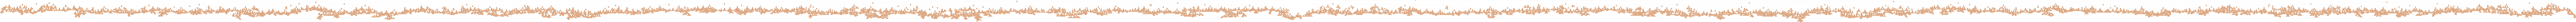

In [13]:
from sklearn.tree import export_graphviz

est = my_model.estimators_[5]
export_graphviz(
    est,
    out_file='tree.dot',
    filled=True
)

from IPython.display import Image
from subprocess import call

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
Image(filename= 'tree.png')